In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
# Exploratory data analysis

In [4]:
df.shape

(8425, 23)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


df contains missing data

In [7]:
list(df.columns)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -Boollean: 1 if rain, 0 otherwise

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Date should be converted into datetime

In [9]:
# converting date and creating columns Year, months, day

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:


# Create new columns for years, months, and days
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [12]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
Year               10
Month              12
Day                31
dtype: int64

In [13]:
for i in df.columns:
    print(df[i].value_counts())

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall,

In [14]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
dtype: int64

- RainTomorrow is a target variable. missing data will be removed from this column
- Rainfall   is a target variable. missing data will be removed from this column
- other missing values will be computed

In [15]:
df.loc[df.duplicated(),]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
3674,2015-10-20,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,...,1016.4,1.0,1.0,21.5,30.3,No,No,2015,10,20
3675,2015-10-21,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,...,1010.6,1.0,5.0,24.7,30.2,No,Yes,2015,10,21
3676,2015-10-22,Williamtown,17.5,26.3,19.8,7.8,NaN,SW,67.0,NaN,...,1008.3,8.0,6.0,18.6,25.6,Yes,NaN,2015,10,22
3677,2015-10-23,Williamtown,14.7,21.4,NaN,NaN,NaN,S,59.0,WSW,...,1020.9,7.0,5.0,15.6,20.3,NaN,NaN,2015,10,23
3678,2015-10-24,Williamtown,11.0,22.5,NaN,NaN,NaN,E,35.0,NW,...,1021.4,NaN,NaN,18.4,21.4,NaN,Yes,2015,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,...,1014.0,8.0,2.0,20.8,23.8,No,No,2012,1,25
6144,2012-01-26,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,...,1016.9,NaN,NaN,18.9,23.7,No,NaN,2012,1,26
6145,2012-01-27,Melbourne,16.6,30.7,NaN,8.0,13.0,SSE,39.0,WSW,...,1013.5,NaN,NaN,20.5,26.3,NaN,NaN,2012,1,27
6146,2012-01-28,Melbourne,20.0,30.4,NaN,8.2,12.1,SSE,37.0,SW,...,1009.2,NaN,NaN,24.1,27.4,NaN,NaN,2012,1,28


In [16]:
df = df.drop_duplicates()

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [18]:
df = df.dropna(subset=['RainTomorrow', 'Rainfall'])

In [19]:
df.isna().sum()

Date                0
Location            0
MinTemp            47
MaxTemp            34
Rainfall            0
Evaporation      2829
Sunshine         3133
WindGustDir       902
WindGustSpeed     902
WindDir9am        767
WindDir3pm        273
WindSpeed9am       41
WindSpeed3pm       80
Humidity9am        35
Humidity3pm        77
Pressure9am      1284
Pressure3pm      1285
Cloud9am         1739
Cloud3pm         1780
Temp9am            32
Temp3pm            73
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [20]:
# replacing nans

In [21]:
col = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm',
      'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
       'Temp9am','Temp3pm']

In [22]:
for column in col:
    if df[column].dtype == 'object':
        # Categorical column: Replace NaN with mode
        mode_value = df[column].mode().iloc[0]  # Use iloc[0] to handle multiple modes
        df[column].fillna(mode_value, inplace=True)
    else:
        # Numerical column: Replace NaN with mean
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)


In [88]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [23]:
df.shape

(6558, 26)

In [24]:
cl=[]
for column in df.columns:
    if df[column].dtype in ('float', 'int'):
        cl.append(column)
        
        

In [25]:
cl

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [26]:
def box(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 15), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

In [27]:
len(cl)

19

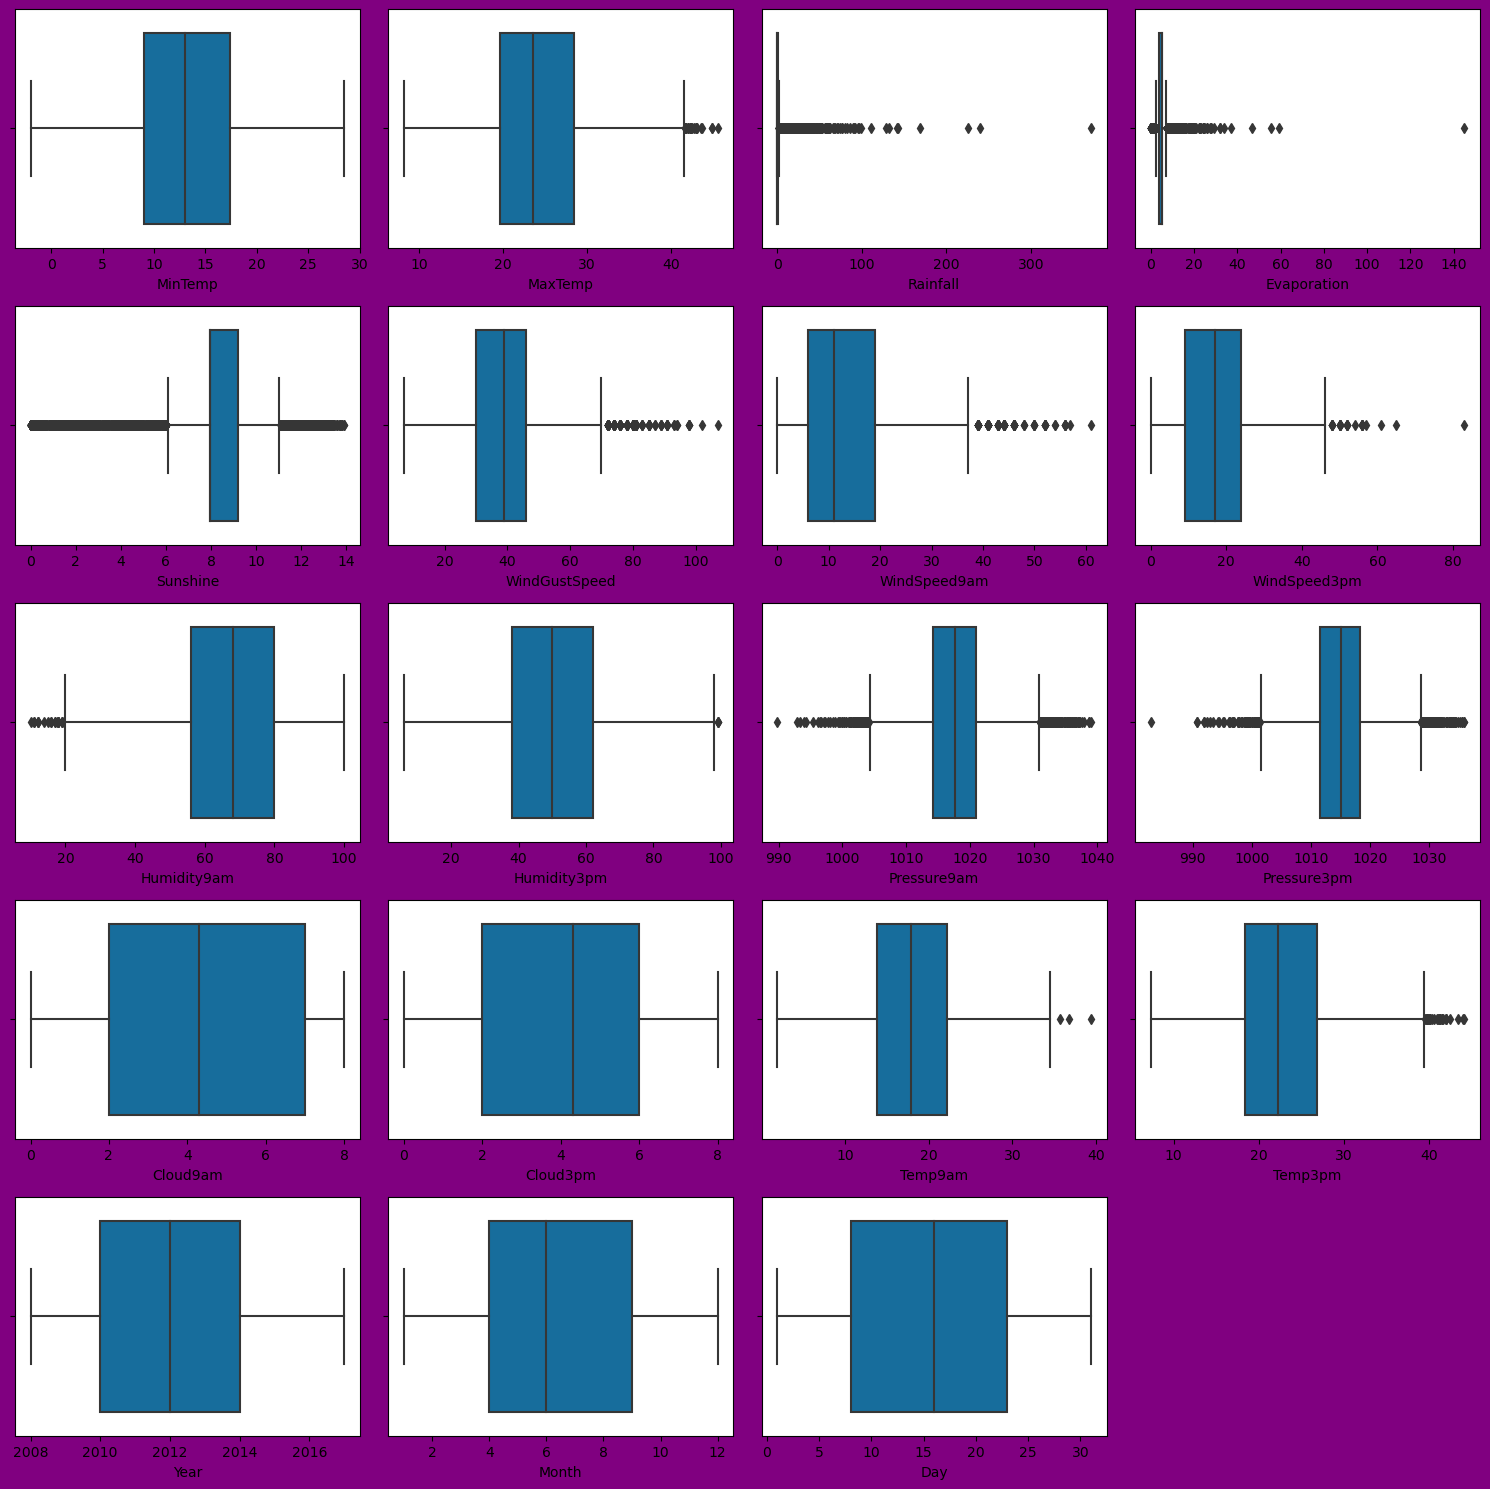

In [28]:
box(cl, df,19, 5, 4, 10)

In [29]:
df[cl].skew()

MinTemp          -0.070644
MaxTemp           0.333636
Rainfall         13.584687
Evaporation      13.636718
Sunshine         -0.910265
WindGustSpeed     0.777812
WindSpeed9am      0.943956
WindSpeed3pm      0.557028
Humidity9am      -0.250975
Humidity3pm       0.151774
Pressure9am       0.021773
Pressure3pm       0.047545
Cloud9am         -0.194064
Cloud3pm         -0.149965
Temp9am          -0.045423
Temp3pm           0.351607
Year              0.355073
Month             0.026796
Day               0.002420
dtype: float64

Rainfall is the only skewed column here

In [89]:
# removing skewness

from scipy.stats import yeojohnson

# Select the column(s) to remove skewness
columns_to_transform = ['WindGustSpeed','Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm']

# Apply Yeo-Johnson transformation to selected columns
df[columns_to_transform] = df[columns_to_transform].apply(lambda a: yeojohnson(a + abs(a.min()) + 1)[0])


In [90]:
df[cl].skew()

MinTemp          -0.070644
MaxTemp           0.333636
Rainfall         13.584687
Evaporation       0.014363
Sunshine         -0.015208
WindGustSpeed     0.005030
WindSpeed9am     -0.069623
WindSpeed3pm     -0.030449
Humidity9am      -0.250975
Humidity3pm       0.151774
Pressure9am       0.021773
Pressure3pm       0.047545
Cloud9am         -0.194064
Cloud3pm         -0.149965
Temp9am          -0.045423
Temp3pm           0.351607
Year              0.355073
Month             0.026796
Day               0.002420
dtype: float64

# predicting Rain amount

In [91]:
df1 = df.copy()

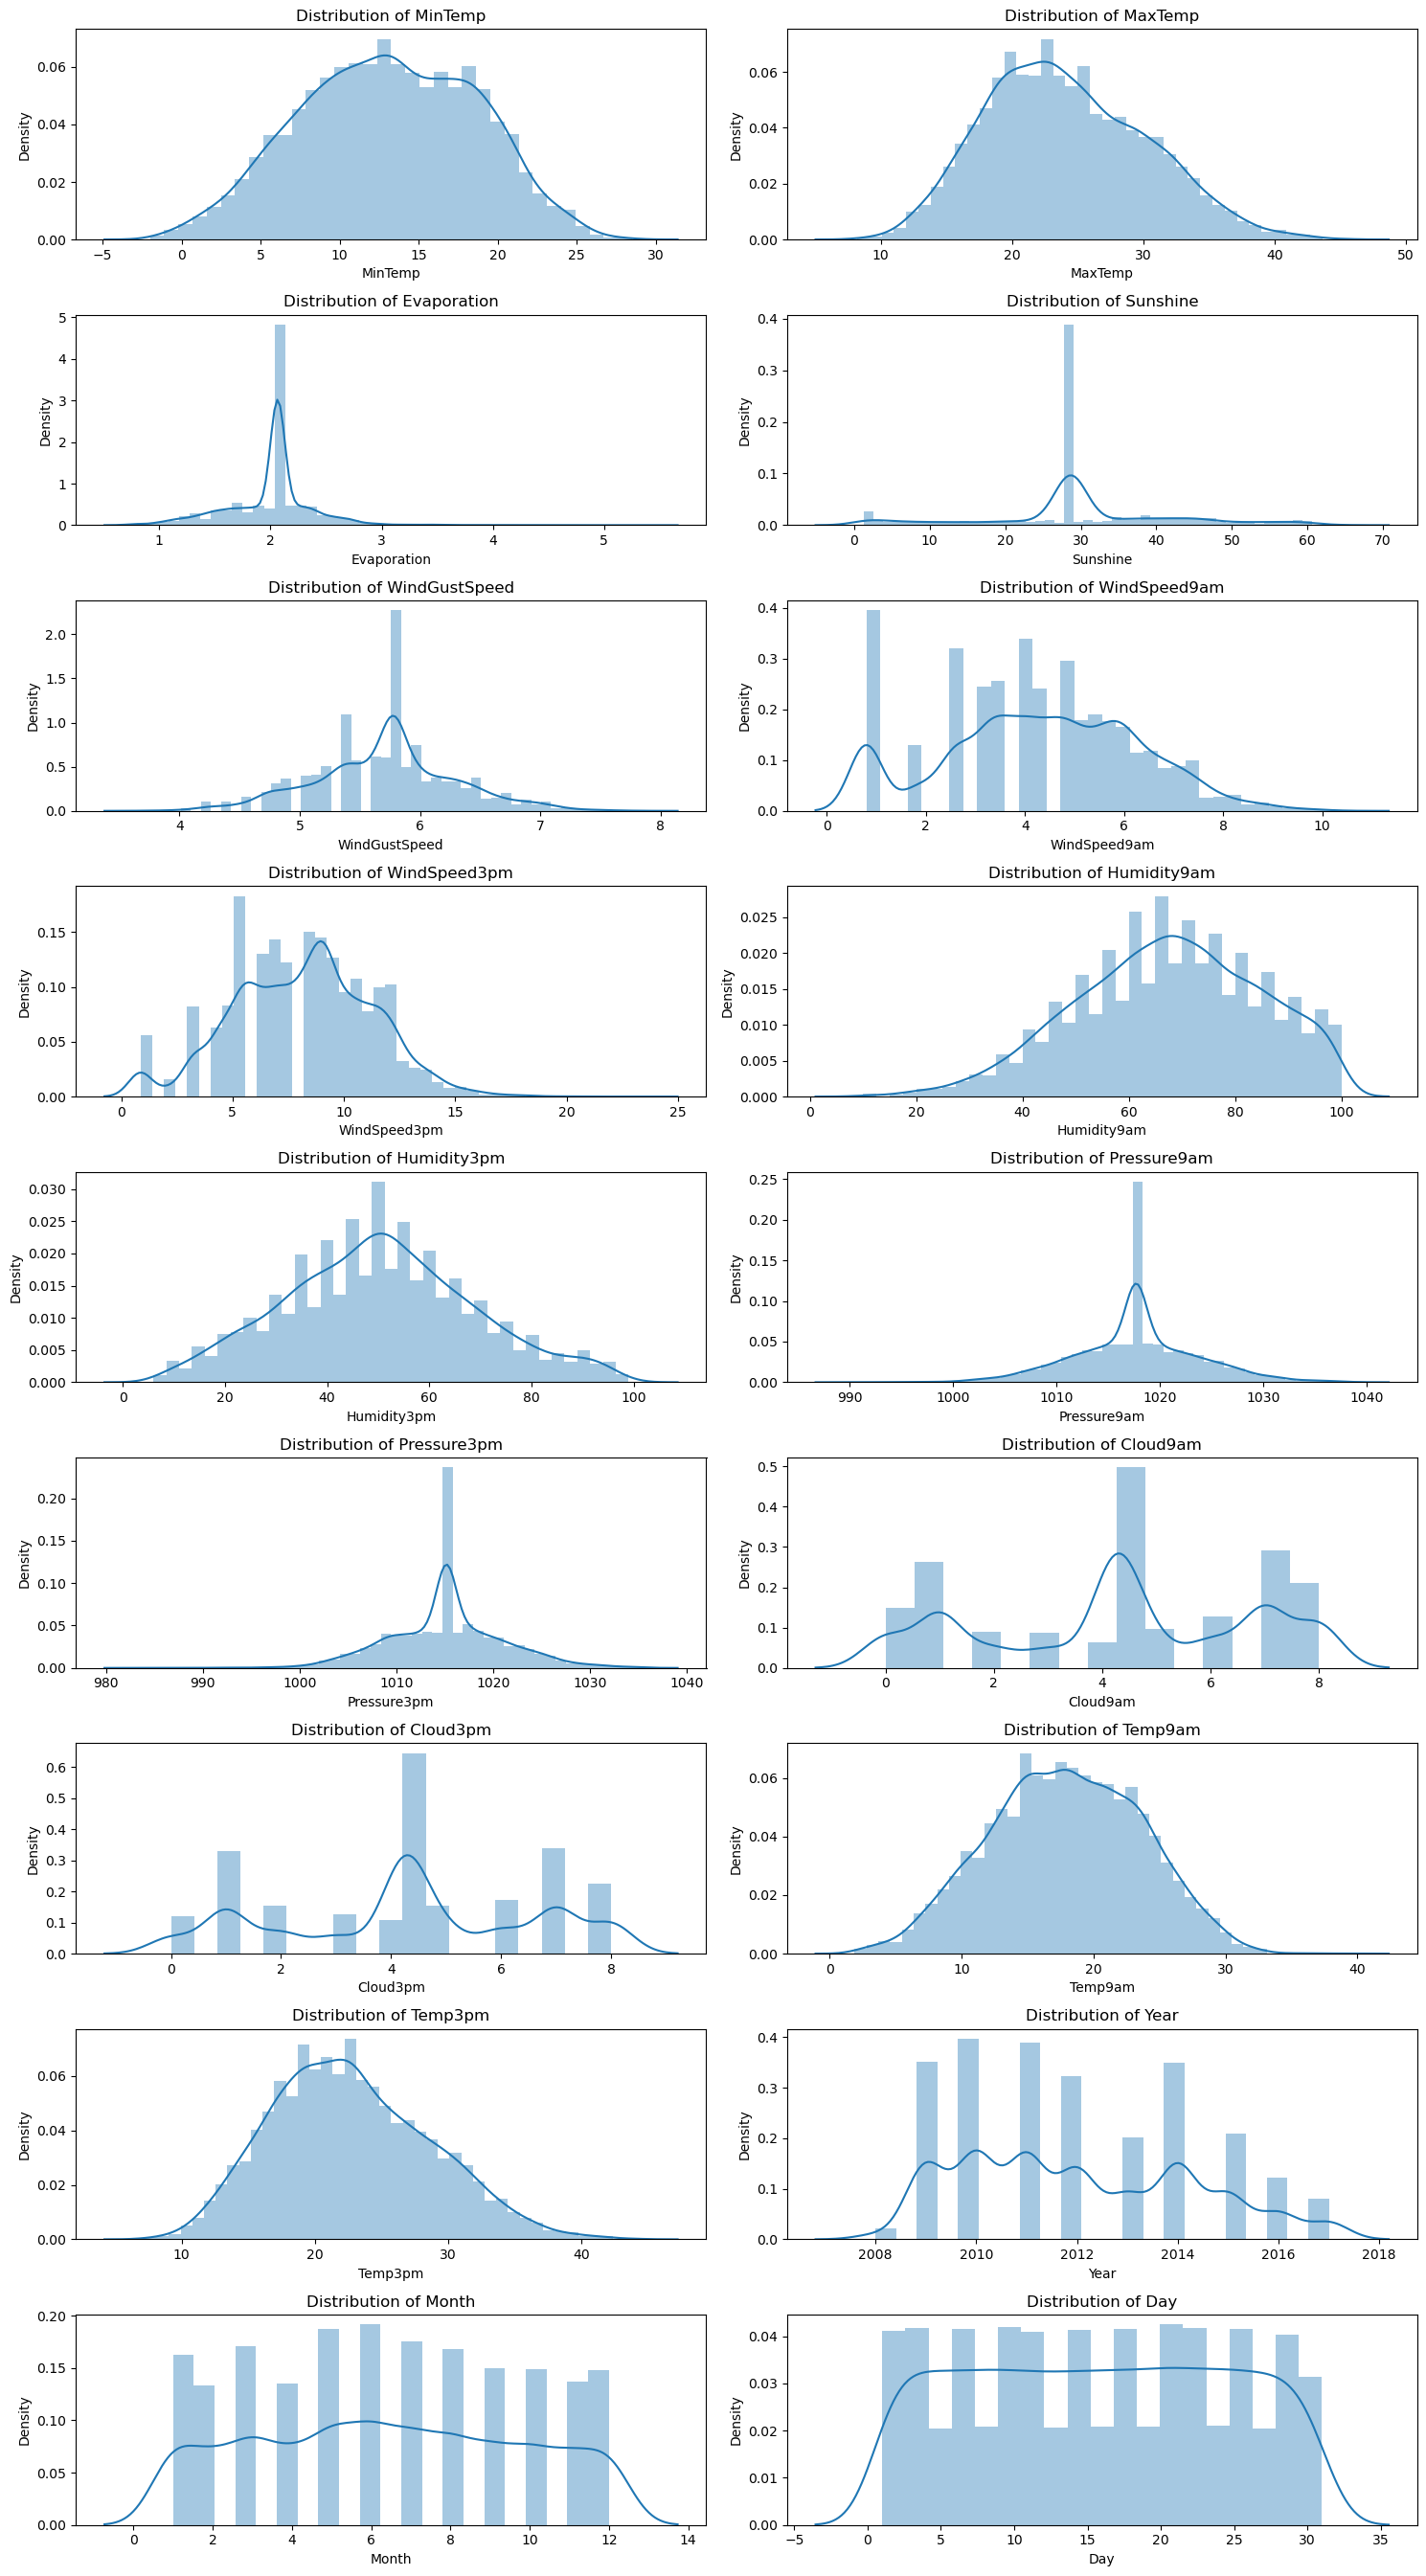

In [92]:
# Filter out non-numeric columns and exclude the "Rainfall" column
numeric_columns = df1.select_dtypes(include='number').columns
numeric_columns = numeric_columns[numeric_columns != 'Rainfall']

# Calculate the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 2) + (num_columns % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot distributions for each numeric column (excluding "Rainfall") using a for loop
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.distplot(df1[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

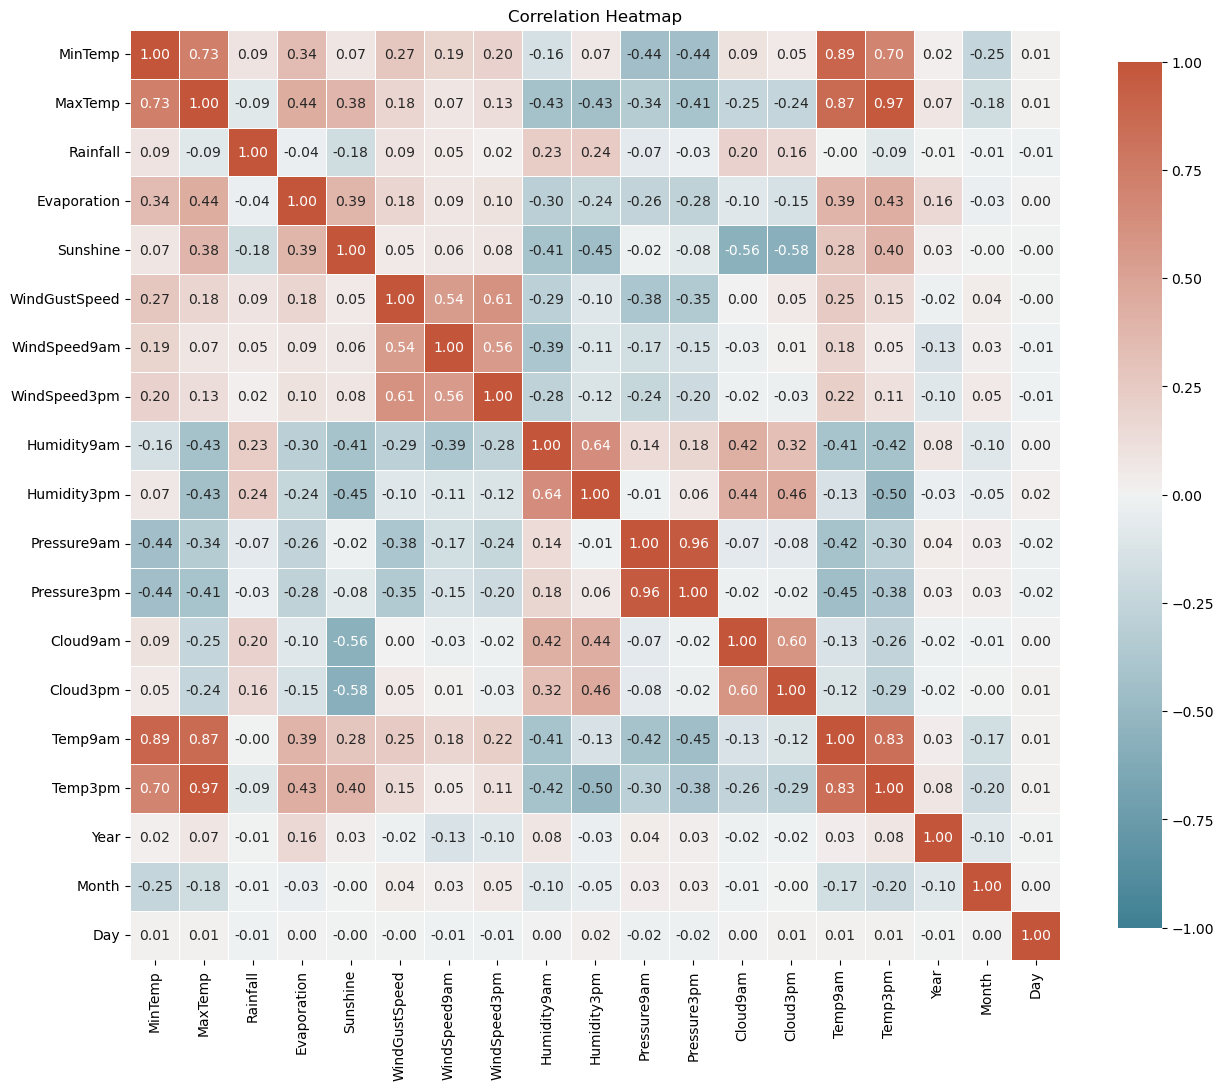

In [93]:
corr_matrix = df1.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

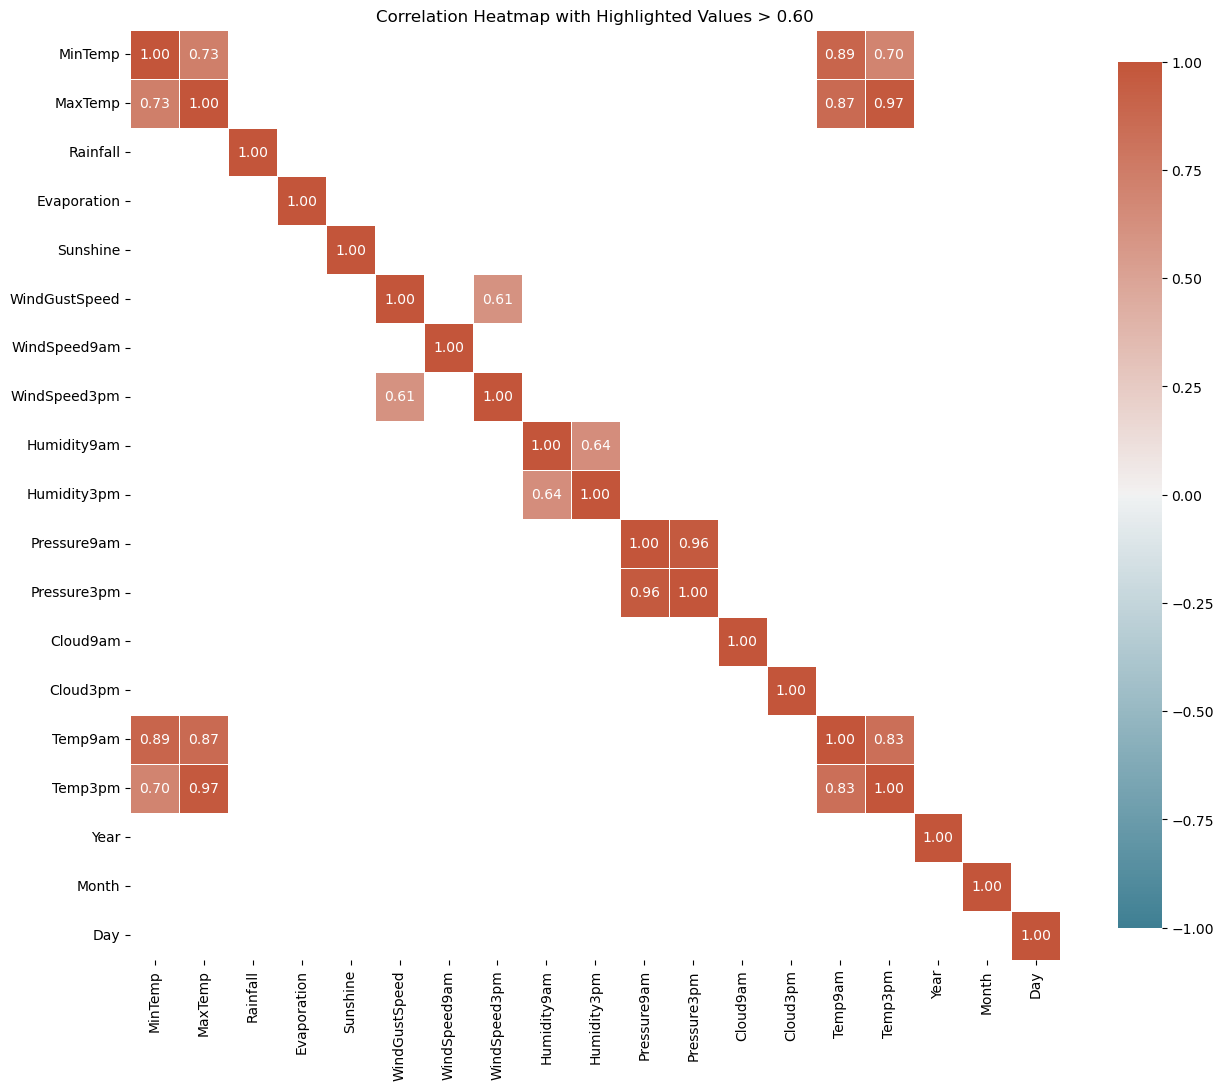

In [94]:
# Calculating the correlation matrix
corr_matrix = df1.corr()

# Seting the threshold for highlighting correlations
highlight_threshold = 0.60

# Creating a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Color all correlations above the threshold in red
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75},
            mask=(corr_matrix.abs() <= highlight_threshold))
plt.title("Correlation Heatmap with Highlighted Values > 0.60")
plt.show()

- MinTemp and MaxTemp are strongly correlated

- MinTemp and Temp9am are strongly correlated
- MaxTemp and Temp3pm are strongly correlated
- MaxTemp and Temp9am are strongly correlated

- Pressure9am and Pressure3pm are strongly correlated


In [35]:
#MinTemp and Temp3pm are strongly correlated
#Temp3pm and Temp9am are strongly correlated
#Humidity9am and Humidity3pm are strongly correlated
#WindSpeed3pm and WindGustSpeed are strongly correlated

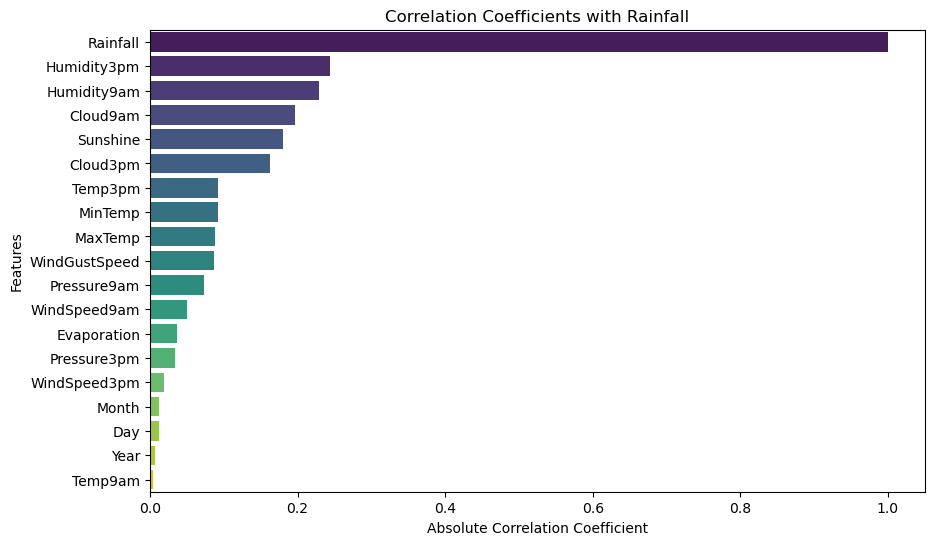

In [95]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Extract correlations with the target variable
corr_with_target = corr_matrix['Rainfall'].abs()

# Sort the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Create a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Rainfall")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

- MinTemp and MaxTemp have the same absolute correaltion with Rainfall. so, we will create a new column taking  computed values of both, and then drop both. In order to have new column which will not be correlated with columns that MinTemp and MaxTemp are correlated with while maintaining data consistency, we will use geometric mean of MinTemp and MaxTemp

- Temp9am will be droped as it is less correlated with Rainfall while being correlated with TempMin

- Pressure3pm will be droped as it is less correlated with Rainfall while being correlated with Pressure9am
- Year, Month, Day have very weak correlation with Rainfall. But let’s first check how they much they explain variation in Rainfall




In [37]:
#Humidity9am and Humidity3pm have almost the absolute correlation with Rainfall. Let’s replace them with a new column taking the average of both

#WindSpeed3pm will be droped as it is less correlated with Rainfall while being correlated with WindGustSpeed

#Year, Month, Day have very weak correlation with Rainfall. But let’s first check how they much they explain variation in Rainfall


In [96]:
#  Create 'Temp' column with the geometric mean
df1['Temp'] = np.sqrt(df1['MaxTemp'] * df1['MinTemp'])

In [97]:
df1.drop(['MaxTemp', 'MinTemp'], axis = 1, inplace = True)

In [98]:
df1.drop(['Temp9am','Pressure3pm','WindSpeed3pm'], axis = 1, inplace = True)

In [101]:
df1['Humidity'] = (df1['Humidity9am'] + df1['Humidity3pm'])/2

In [102]:
df1.drop(['Humidity9am','Humidity3pm'], axis = 1, inplace = True)

In [42]:
# analysing Rainfall trends over Date, Year, Month, Day

Text(0.5, 1.0, 'Rainfall')

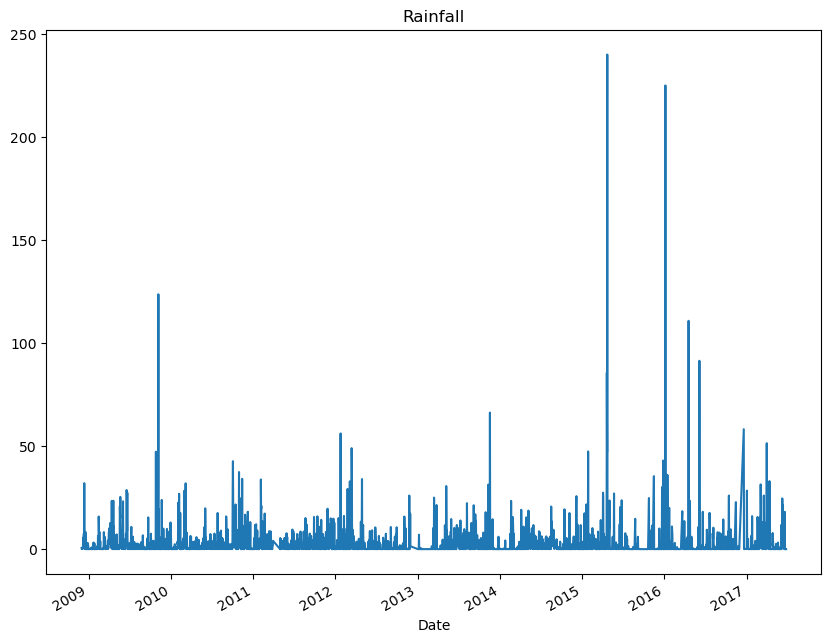

In [103]:
grouped_date=df1.groupby('Date').mean() # this groups df by Date and calculate mean of each numerical column 
plt.figure(figsize=(10,8))
grouped_date['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

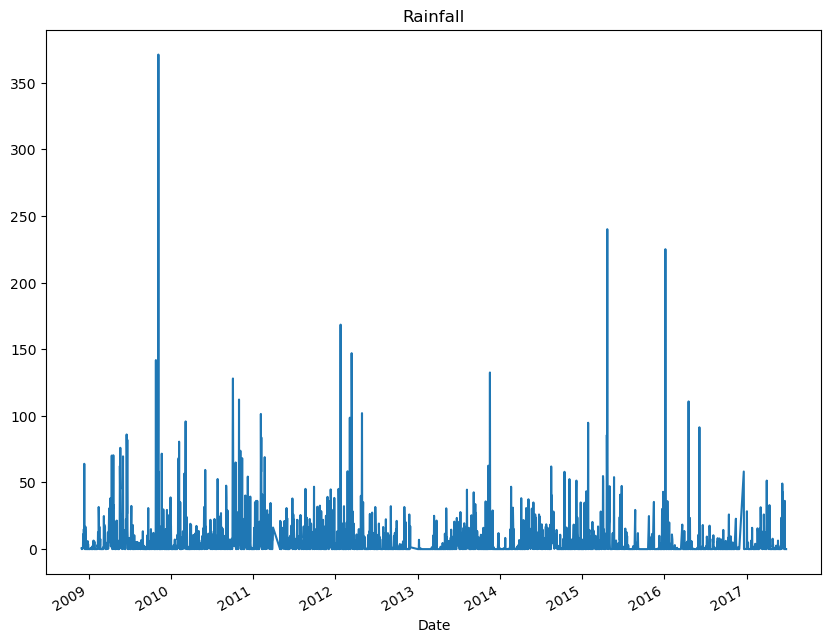

In [104]:
grouped_dat=df1.groupby('Date').sum() 
plt.figure(figsize=(10,8))
grouped_dat['Rainfall'].plot()
plt.title('Rainfall')

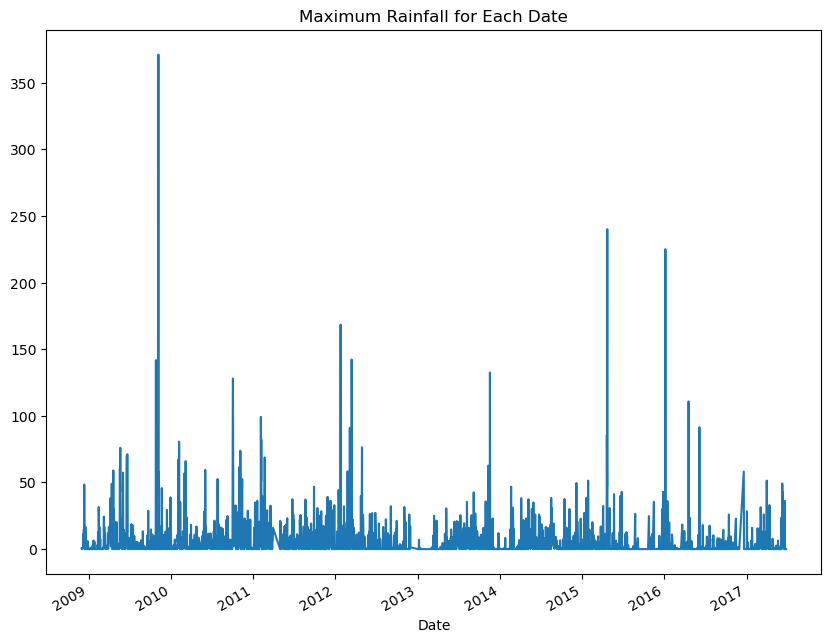

In [45]:
# Group by 'Date' and get the largest values for each date in 'Rainfall'
grouped_dat = df1.groupby('Date')['Rainfall'].max()
plt.figure(figsize=(10, 8))
grouped_dat.plot()
plt.title('Maximum Rainfall for Each Date')
plt.show()

Text(0.5, 1.0, 'Rainfall')

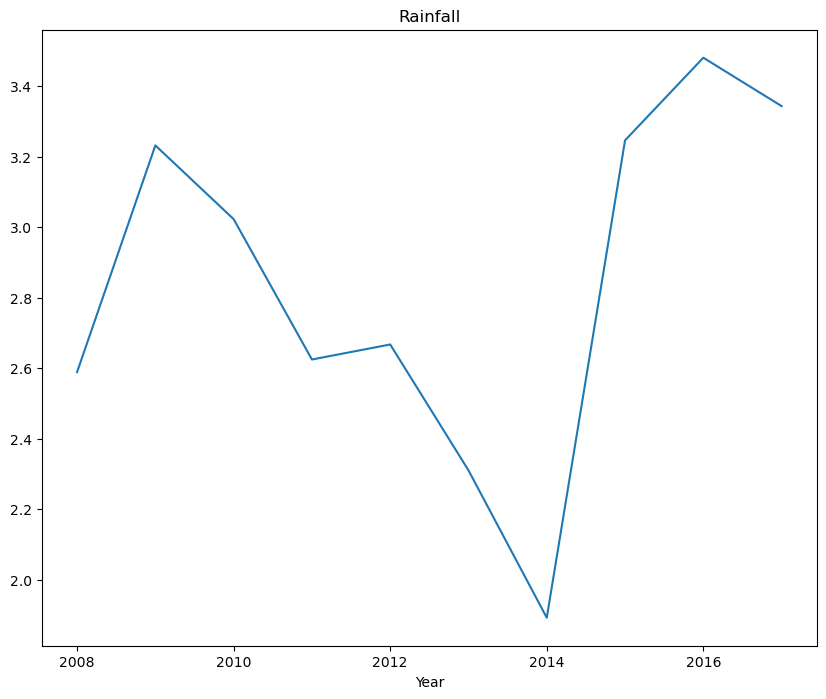

In [105]:
grouped_year=df1.groupby('Year').mean() 
plt.figure(figsize=(10,8))
grouped_year['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

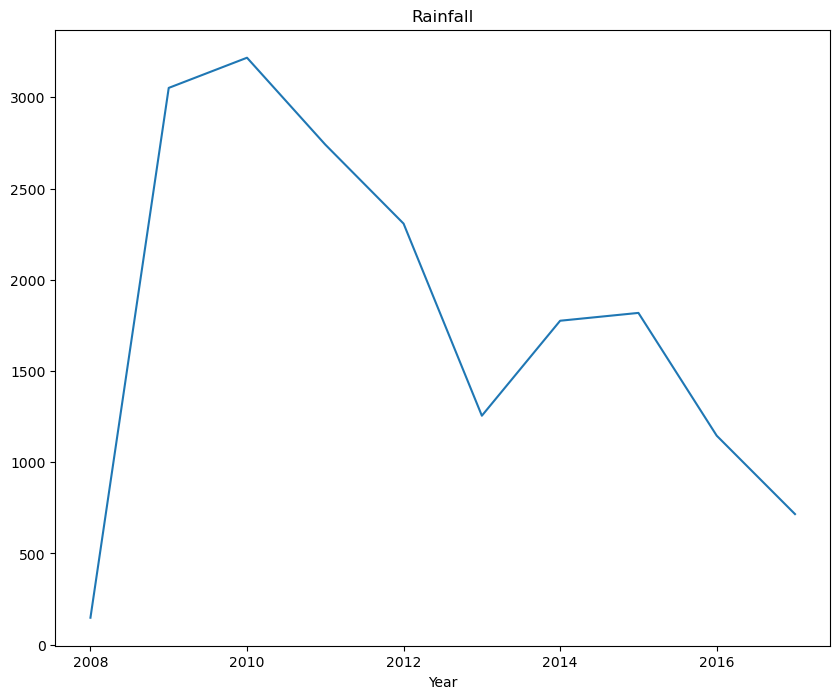

In [106]:
grouped_year=df1.groupby('Year').sum() 
plt.figure(figsize=(10,8))
grouped_year['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

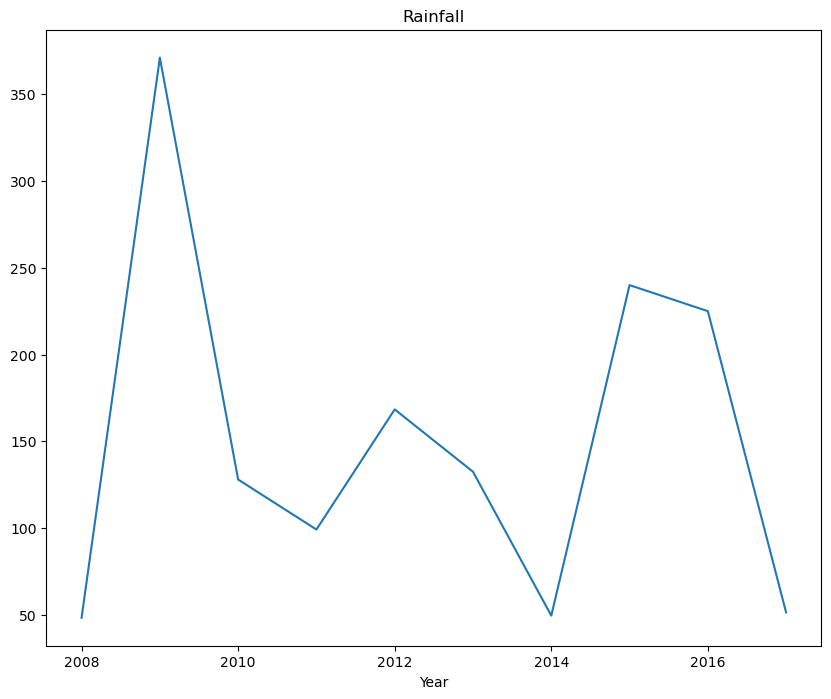

In [107]:
grouped_year=df1.groupby('Year').max() 
plt.figure(figsize=(10,8))
grouped_year['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

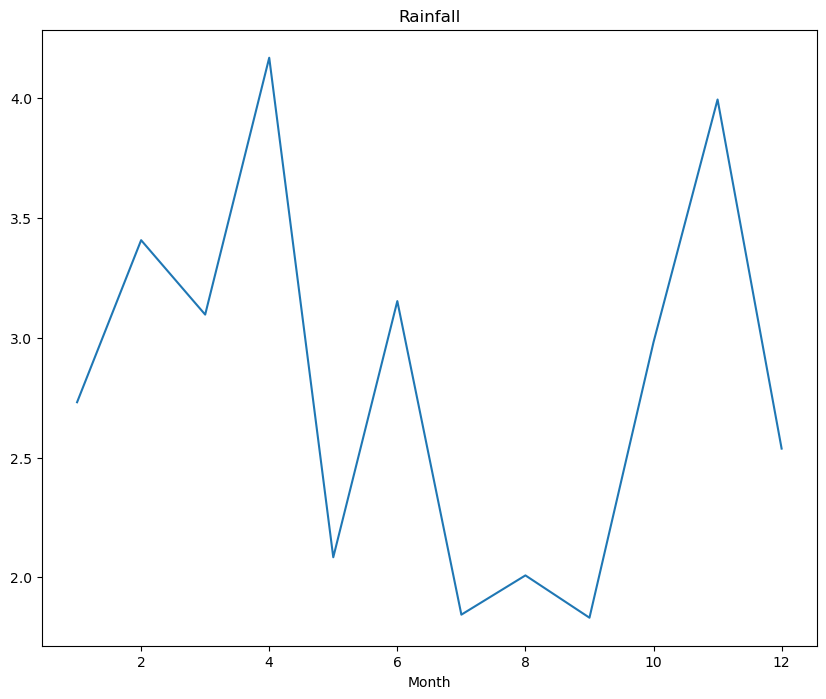

In [108]:
grouped=df1.groupby('Month').mean() 
plt.figure(figsize=(10,8))
grouped['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

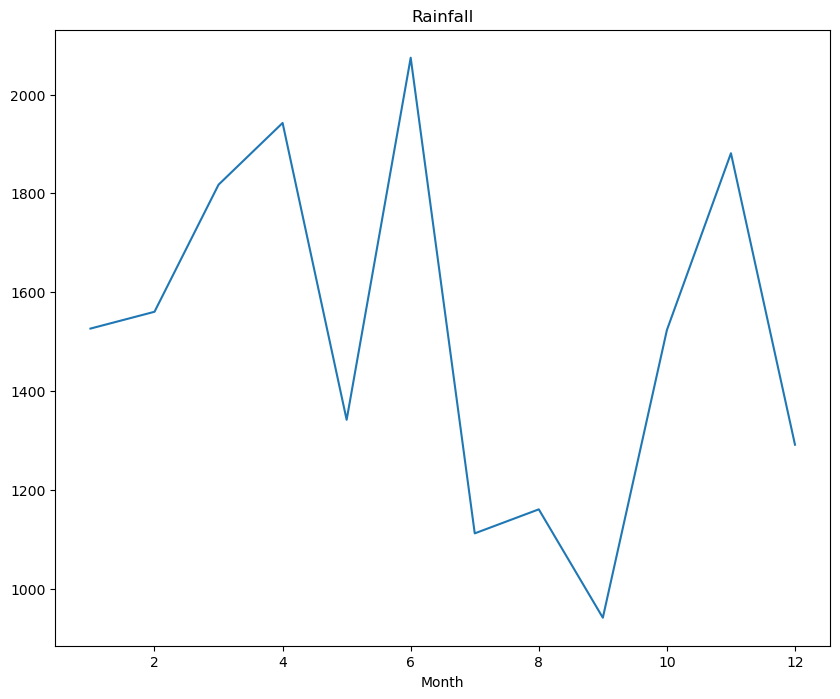

In [109]:
grouped=df1.groupby('Month').sum() 
plt.figure(figsize=(10,8))
grouped['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

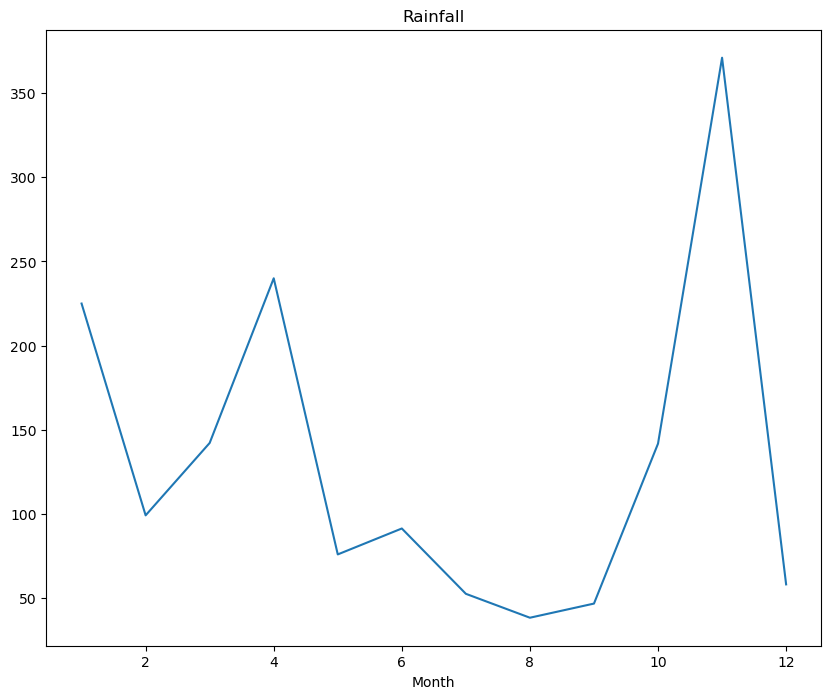

In [110]:
grouped=df1.groupby('Month').max() 
plt.figure(figsize=(10,8))
grouped['Rainfall'].plot()
plt.title('Rainfall')

Text(0.5, 1.0, 'Rainfall')

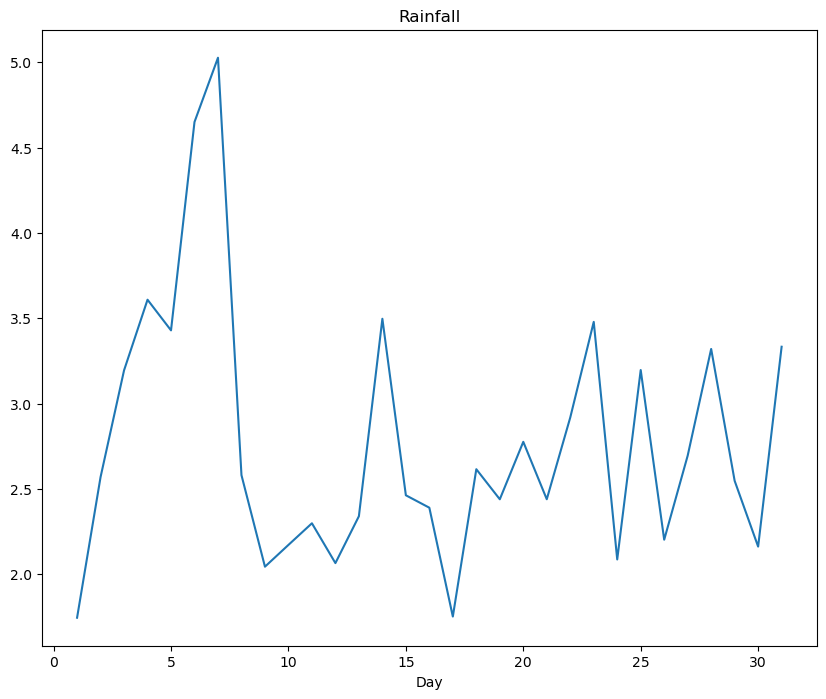

In [111]:
grouped=df1.groupby('Day').mean() 
plt.figure(figsize=(10,8))
grouped['Rainfall'].plot()
plt.title('Rainfall')

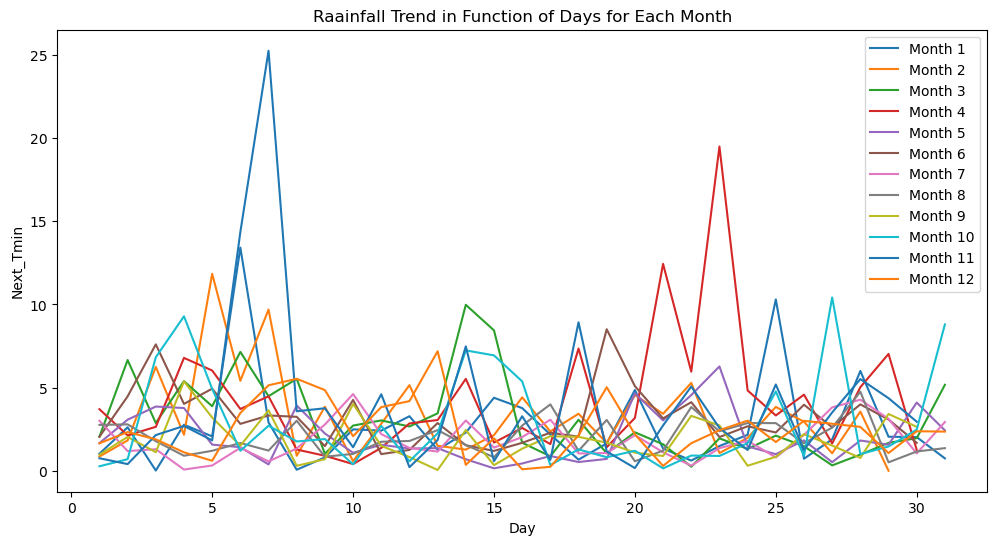

In [112]:
# Group by 'Month' and 'Day' and calculate the mean temperature
monthly_avg_temp = df1.groupby(['Month', 'Day'])['Rainfall'].mean().reset_index()

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

for month in range(1, 13):  # Assuming months are from 1 to 12
    month_data = monthly_avg_temp[monthly_avg_temp['Month'] == month]
    ax.plot(month_data['Day'], month_data['Rainfall'], label=f'Month {month}')

ax.set_xlabel('Day')
ax.set_ylabel('Next_Tmin')
ax.set_title('Raainfall Trend in Function of Days for Each Month')
ax.legend(loc='upper right')
plt.show()

we can see that Rainfall varies across Year, Month, Day. So, we will keep these columns for now

In [113]:
list(df1.columns)

['Date',
 'Location',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day',
 'Temp',
 'Humidity']

In [114]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df1:
    if df1[column].dtypes == 'object':  
        df1[column] = encoder.fit_transform(df1[column].values.reshape(-1,1))


df1

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Temp,Humidity
0,2008-12-01,1.0,0.6,2.064951,28.66179,13.0,5.999946,13.0,14.0,5.986804,...,8.000000,4.301172,21.8,0.0,0.0,2008,12,1,17.517420,46.5
1,2008-12-02,1.0,0.0,2.064951,28.66179,14.0,5.999946,6.0,15.0,2.590946,...,4.304212,4.301172,24.3,0.0,0.0,2008,12,2,13.628646,34.5
2,2008-12-03,1.0,0.0,2.064951,28.66179,15.0,6.080712,13.0,15.0,5.833292,...,4.304212,2.000000,23.2,0.0,0.0,2008,12,3,18.207965,34.0
3,2008-12-04,1.0,0.0,2.064951,28.66179,4.0,5.016840,9.0,0.0,4.402678,...,4.304212,4.301172,26.5,0.0,0.0,2008,12,4,16.049922,30.5
4,2008-12-05,1.0,1.0,2.064951,28.66179,13.0,5.874072,1.0,7.0,3.473009,...,7.000000,8.000000,29.7,0.0,0.0,2008,12,5,23.774987,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,9.0,0.0,2.064951,28.66179,0.0,5.405071,2.0,0.0,5.169934,...,4.304212,4.301172,20.9,0.0,0.0,2017,6,20,8.734987,43.0
8420,2017-06-21,9.0,0.0,2.064951,28.66179,0.0,5.405071,9.0,1.0,4.801980,...,4.304212,4.301172,22.4,0.0,0.0,2017,6,21,8.094443,37.5
8421,2017-06-22,9.0,0.0,2.064951,28.66179,6.0,4.893777,9.0,3.0,4.801980,...,4.304212,4.301172,24.5,0.0,0.0,2017,6,22,9.543584,38.5
8422,2017-06-23,9.0,0.0,2.064951,28.66179,3.0,5.696423,9.0,14.0,3.963817,...,4.304212,4.301172,26.1,0.0,0.0,2017,6,23,12.052386,38.5


In [115]:
list(df1.columns)

['Date',
 'Location',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day',
 'Temp',
 'Humidity']

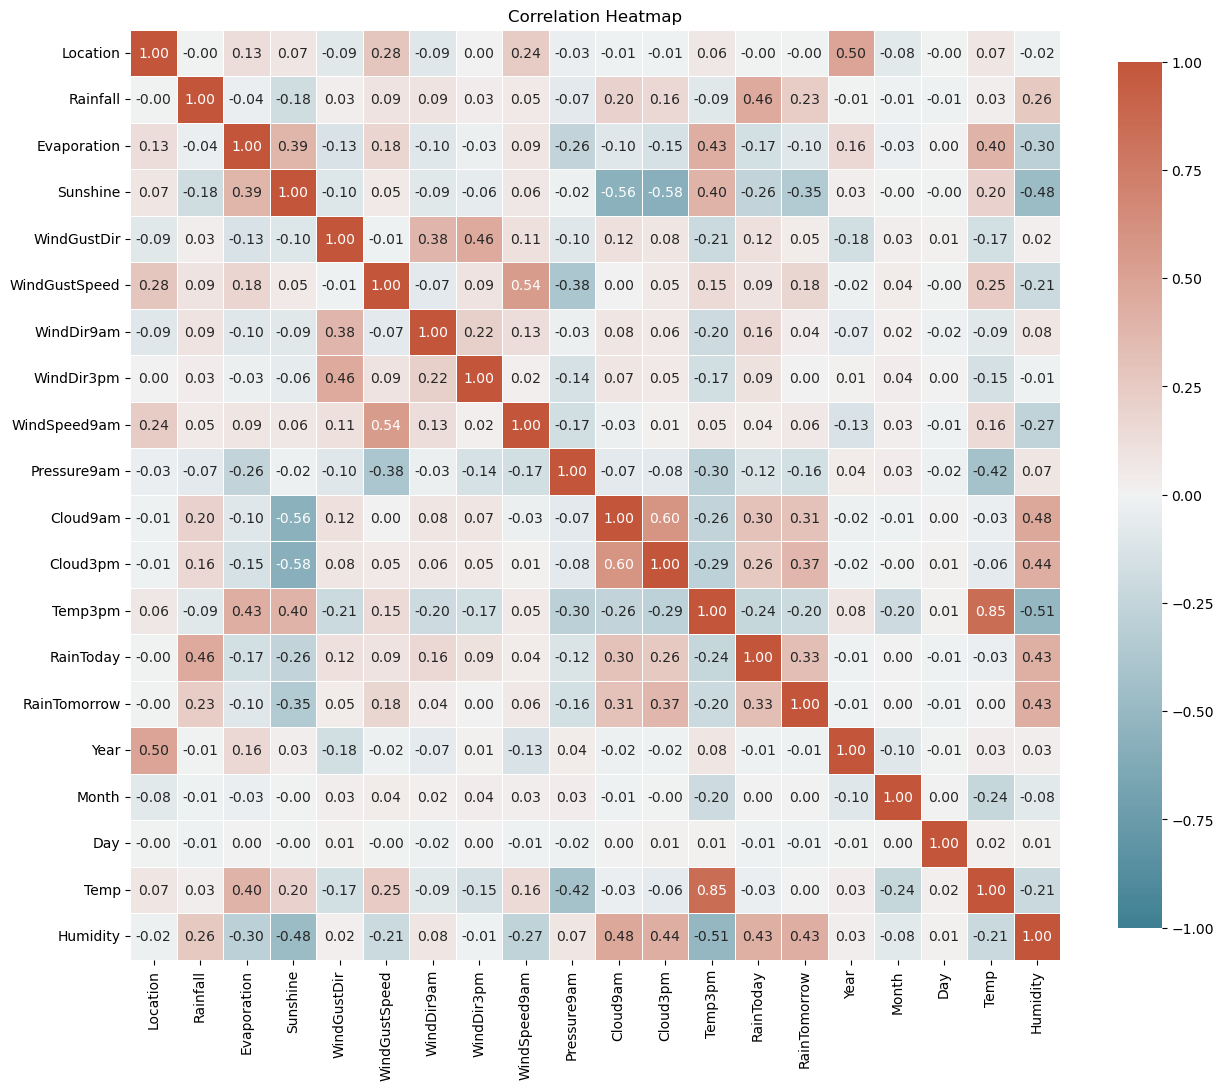

In [116]:
corr_matrix = df1.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

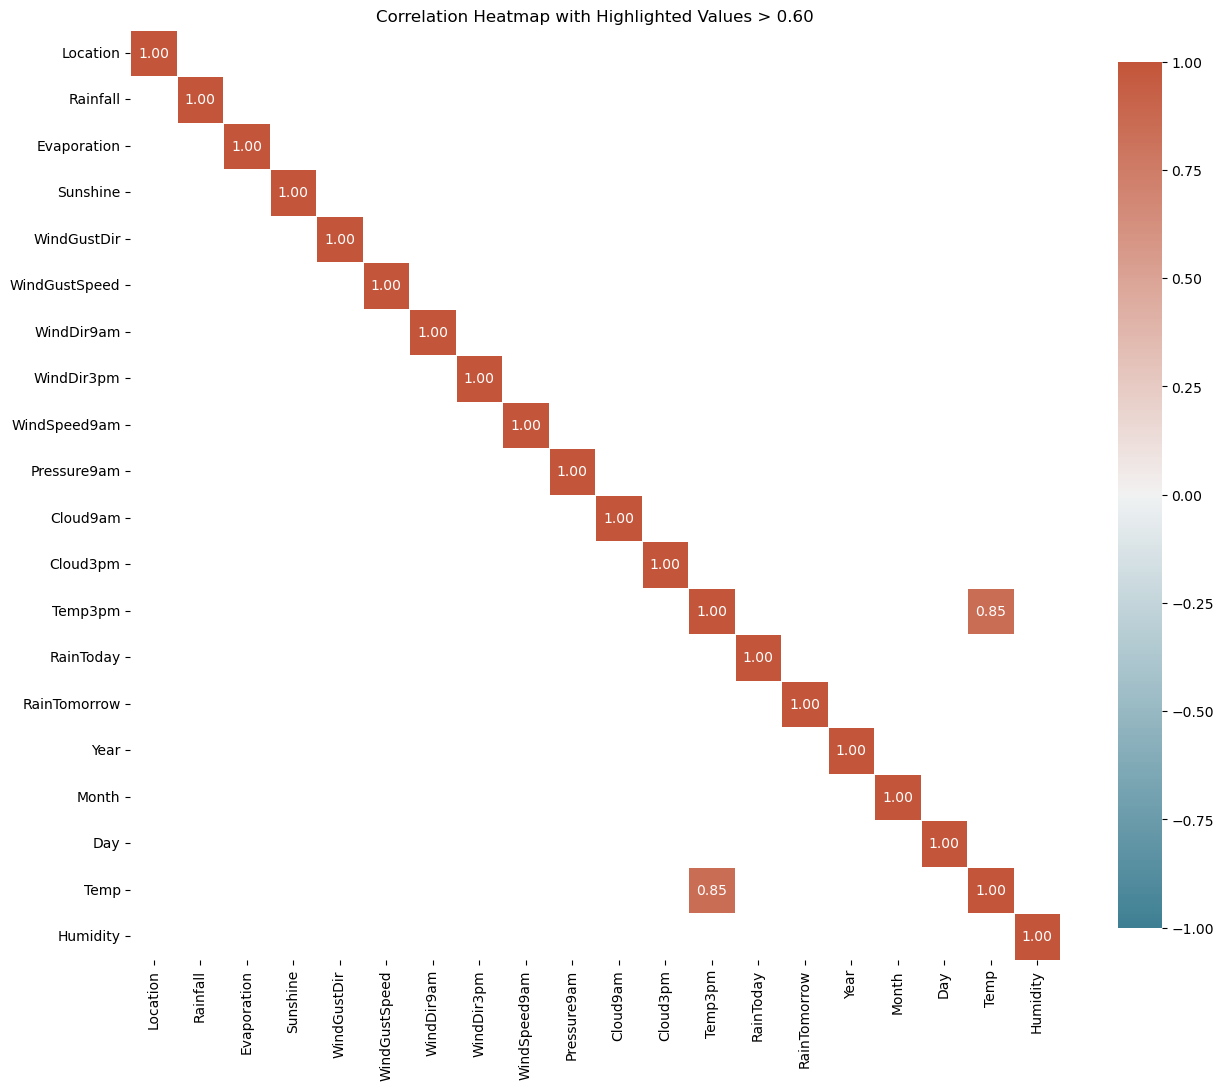

In [117]:
# Calculating the correlation matrix
corr_matrix = df1.corr()

# Seting the threshold for highlighting correlations
highlight_threshold = 0.60

# Creating a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Color all correlations above the threshold in red
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75},
            mask=(corr_matrix.abs() <= highlight_threshold))
plt.title("Correlation Heatmap with Highlighted Values > 0.60")
plt.show()

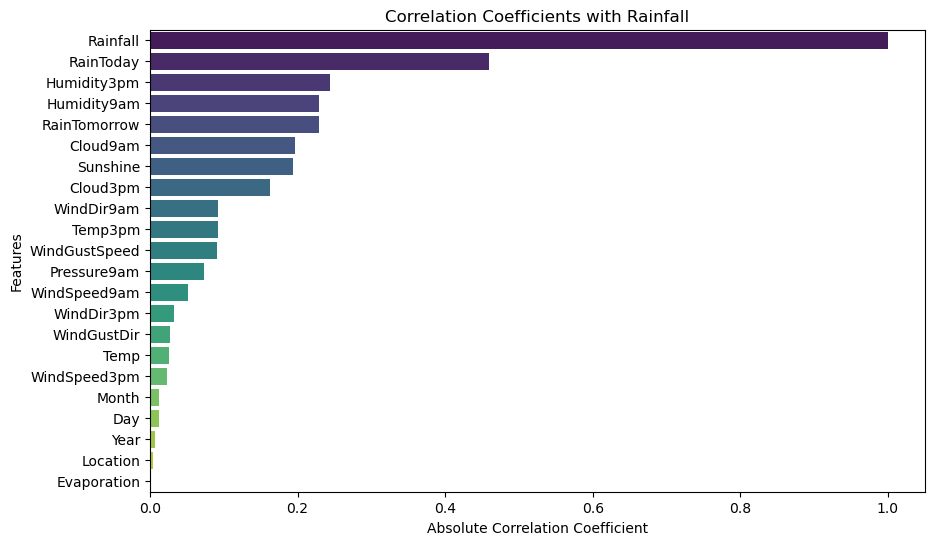

In [58]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Extract correlations with the target variable
corr_with_target = corr_matrix['Rainfall'].abs()

# Sort the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Create a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Rainfall")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

- Let's drop Tem, as it is correlated with Temp3pm
- we will also drop Location and Year are they have negligible correlation with the target

In [59]:
df1.drop(['Temp','Location','Year'], axis = 1, inplace = True)

In [60]:
list(df1.columns)

['Date',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Month',
 'Day']

# Feature selection for Rainfall

In [ ]:
# As features are very low coreelated with the target, let's test different correalation thresholds

In [164]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Select features with correlation > 0.1 with 'Rainfall'
relevant_features = correlation_matrix['Rainfall'][abs(correlation_matrix['Rainfall']) > 0.07].index.tolist()

# Subset the DataFrame with relevant features
df_rf = df1[relevant_features]

df_rf


,Rainfall,Sunshine,WindGustSpeed,WindDir9am,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Humidity
0,0.6,28.66179,5.999946,13.0,1007.7,8.000000,4.301172,21.8,0.0,0.0,46.5
1,0.0,28.66179,5.999946,6.0,1010.6,4.304212,4.301172,24.3,0.0,0.0,34.5
2,0.0,28.66179,6.080712,13.0,1007.6,4.304212,2.000000,23.2,0.0,0.0,34.0
3,0.0,28.66179,5.016840,9.0,1017.6,4.304212,4.301172,26.5,0.0,0.0,30.5
4,1.0,28.66179,5.874072,1.0,1010.8,7.000000,8.000000,29.7,0.0,0.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...
8419,0.0,28.66179,5.405071,2.0,1024.7,4.304212,4.301172,20.9,0.0,0.0,43.0
8420,0.0,28.66179,5.405071,9.0,1024.6,4.304212,4.301172,22.4,0.0,0.0,37.5
8421,0.0,28.66179,4.893777,9.0,1023.5,4.304212,4.301172,24.5,0.0,0.0,38.5
8422,0.0,28.66179,5.696423,9.0,1021.0,4.304212,4.301172,26.1,0.0,0.0,38.5


In [165]:
# seprating features and target

x = df_rf.drop('Rainfall', axis =1)
y = df_rf['Rainfall']

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

        Variable       VIF
0       Sunshine  1.894028
1  WindGustSpeed  1.348320
2     WindDir9am  1.083678
3    Pressure9am  1.353189
4       Cloud9am  1.862433
5       Cloud3pm  1.892799
6        Temp3pm  1.642976
7      RainToday  1.345762
8   RainTomorrow  1.450217
9       Humidity  2.166869


In [122]:
# Modelling

In [121]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn .metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [167]:

max_accu = 0
max_rs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    
    pred = lr_model.predict(x_test)
    
    current_accu = r2_score(y_test, pred)
    
    if current_accu > max_accu:
        max_accu = current_accu
        max_rs = i

print('Max R2 score is:', max_accu, 'at Random_state:', max_rs)

Max R2 score is: 0.368599951152335 at Random_state: 33


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [169]:


# training the data on each algorithm and CV

L = LinearRegression()
R = RandomForestRegressor()
G = GradientBoostingRegressor()
D = DecisionTreeRegressor()
K = KNN()
l = Lasso()
r = Ridge()


Mod = [L,R,G,D,K,l,r]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    score = cross_val_score(model,x,y, cv = 7, scoring = 'r2')
    print('R2_score training data: ', r2_score(y_train, model.predict(x_train)))
    print('R2_score: ', r2_score(y_test, pred_model))
    print('Mean absolute error: ', mean_absolute_error(y_test, pred_model))
    print('Mean squared error: ', mean_squared_error(y_test, pred_model))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_model)))
    print(score)
    print(score.mean())
    print('The difference between R2 score and cross validation score for ', model, 'is: ', (r2_score(y_test, pred_model) - score.mean()))
    print('\n')

R2_score training data:  0.20243981702067082
R2_score:  0.368599951152335
Mean absolute error:  2.9698049639144686
Mean squared error:  44.940586028096725
Root mean squared error:  6.703774013799744
[0.33047113 0.15318766 0.17383907 0.23851243 0.2345798  0.38981004
 0.31222383]
0.2618034237832611
The difference between R2 score and cross validation score for  LinearRegression() is:  0.10679652736907391


R2_score training data:  0.9007063513496709
R2_score:  0.3976464318589116
Mean absolute error:  2.385495599444593
Mean squared error:  42.87317113418008
Root mean squared error:  6.5477607725221665
[ 0.13314616  0.18703657  0.14884383 -0.12657826  0.17337499  0.08887232
  0.60477071]
0.17278090432440077
The difference between R2 score and cross validation score for  RandomForestRegressor() is:  0.2248655275345108


R2_score training data:  0.6186149972313599
R2_score:  0.3720301853280301
Mean absolute error:  2.429055396720463
Mean squared error:  44.69643537535178
Root mean squared er

- Many correlation thresholds have been tested but the model performance remains poor.

- I have even used PCA for dimensionally reduction but the models still perform very poorly

- this maybe due to irrelevance of the dataset provided, as the correlation with Rainfall remains very weak



In [184]:
df['Rainfall'].value_counts()

0.0      4292
0.2       320
0.4       144
0.6        85
1.2        68
         ... 
141.8       1
49.6        1
30.0        1
37.6        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

the poor performance is also very likely to be due to the fact that Rainfall is highly filled with 0 values

In [ ]:
# recommendation 

- augment data to include more relevant data to Rainfal, perform deeper data analytics to understand what are factors upon which depends Rainfall in order to select relevant features for predictions
- change the target and test on RainToday

# Feature selection for RainToday

In [194]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Select features with correlation > 0.1 with 'Rainfall'
relevant_features = correlation_matrix['RainToday'][abs(correlation_matrix['RainToday']) >0.05].index.tolist()

# Subset the DataFrame with relevant features
df_t = df1[relevant_features]

df_t


,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Humidity
0,0.6,2.064951,28.66179,13.0,5.999946,13.0,14.0,1007.7,8.000000,4.301172,21.8,0.0,0.0,46.5
1,0.0,2.064951,28.66179,14.0,5.999946,6.0,15.0,1010.6,4.304212,4.301172,24.3,0.0,0.0,34.5
2,0.0,2.064951,28.66179,15.0,6.080712,13.0,15.0,1007.6,4.304212,2.000000,23.2,0.0,0.0,34.0
3,0.0,2.064951,28.66179,4.0,5.016840,9.0,0.0,1017.6,4.304212,4.301172,26.5,0.0,0.0,30.5
4,1.0,2.064951,28.66179,13.0,5.874072,1.0,7.0,1010.8,7.000000,8.000000,29.7,0.0,0.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,0.0,2.064951,28.66179,0.0,5.405071,2.0,0.0,1024.7,4.304212,4.301172,20.9,0.0,0.0,43.0
8420,0.0,2.064951,28.66179,0.0,5.405071,9.0,1.0,1024.6,4.304212,4.301172,22.4,0.0,0.0,37.5
8421,0.0,2.064951,28.66179,6.0,4.893777,9.0,3.0,1023.5,4.304212,4.301172,24.5,0.0,0.0,38.5
8422,0.0,2.064951,28.66179,3.0,5.696423,9.0,14.0,1021.0,4.304212,4.301172,26.1,0.0,0.0,38.5


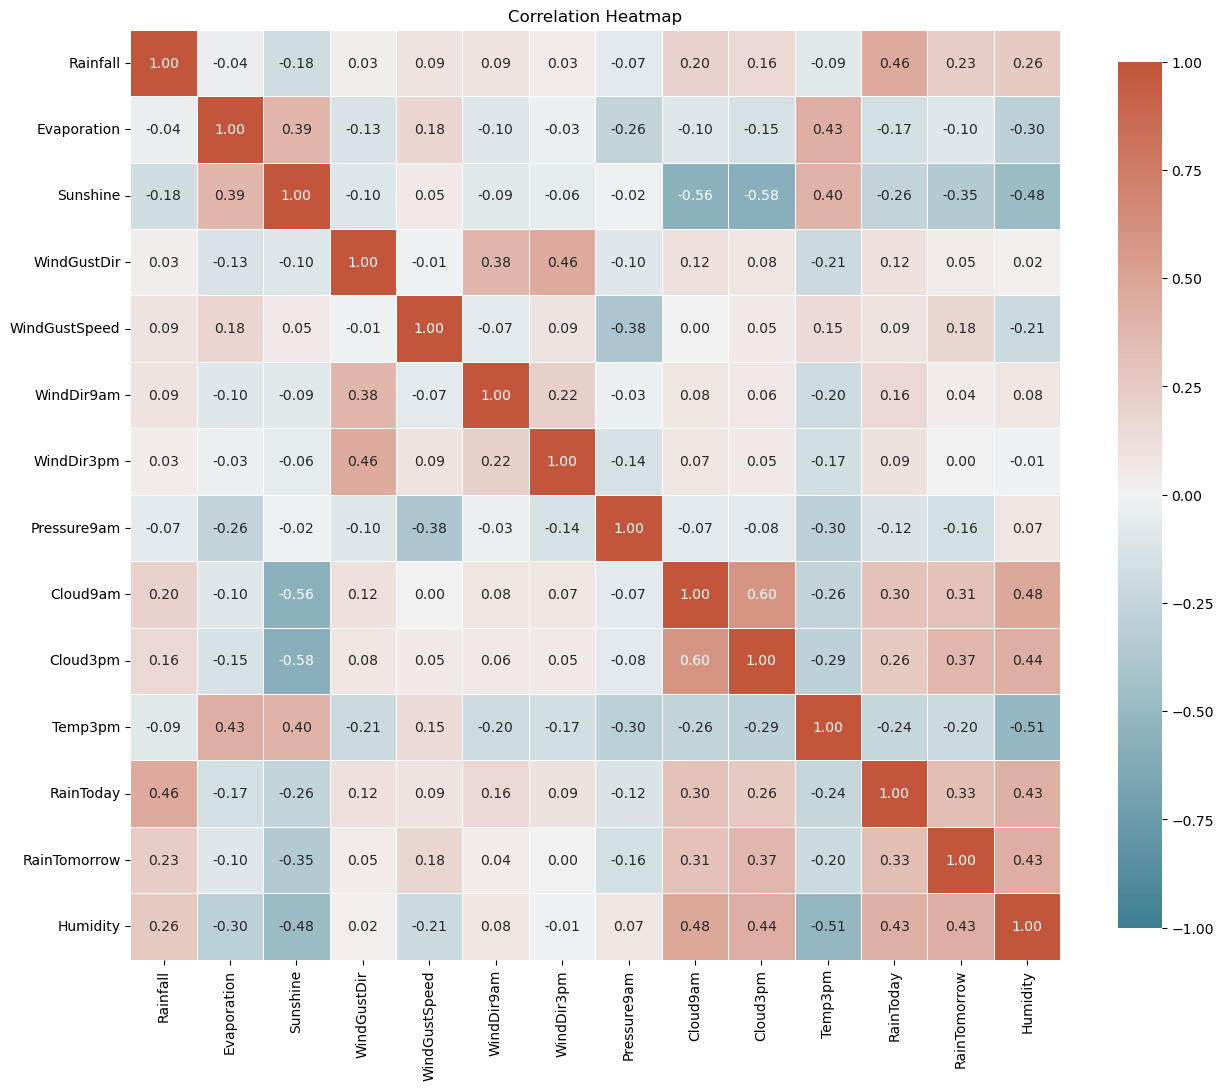

In [195]:
corr_matrix = df_t.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

In [196]:
# seprating features and target

x1 = df_t.drop('RainToday', axis =1)
y1 = df_t['RainToday']

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x1.columns
vif["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

         Variable       VIF
0        Rainfall  1.125466
1     Evaporation  1.440338
2        Sunshine  2.104359
3     WindGustDir  1.468860
4   WindGustSpeed  1.353077
5      WindDir9am  1.207476
6      WindDir3pm  1.325813
7     Pressure9am  1.429687
8        Cloud9am  1.915012
9        Cloud3pm  1.899499
10        Temp3pm  1.846701
11   RainTomorrow  1.447061
12       Humidity  2.131778


In [198]:
y1.value_counts()

0.0    5005
1.0    1553
Name: RainToday, dtype: int64

In [199]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x2, y2 = smote.fit_resample(x1, y1)

In [200]:
x1=x2
y1=y2

In [201]:
y1.value_counts()

0.0    5005
1.0    5005
Name: RainToday, dtype: int64

In [202]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [203]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x1_train,y1_train)
    pred_model = model.predict(x1_test)
    acc = accuracy_score(y1_test, pred_model)
    pred_train = model.predict(x1_train)
    print('accuracy_score on training data: ', accuracy_score(y1_train, pred_train))
    score = cross_val_score(model,x1,y1)
    print(accuracy_score(y1_test, pred_model))
    print(confusion_matrix(y1_test, pred_model))
    print(classification_report(y1_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y1_test, pred_model) - score.mean())
    print('\n')

accuracy_score on training data:  0.9886772345810577
0.986016779864163
[[1269    1]
 [  34 1199]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1270
         1.0       1.00      0.97      0.99      1233

    accuracy                           0.99      2503
   macro avg       0.99      0.99      0.99      2503
weighted avg       0.99      0.99      0.99      2503

[0.97502498 0.98151848 0.99350649 0.99000999 0.99400599]
0.9868131868131869
The difference between accuracy score and cross validation score of  LogisticRegression() is:  -0.0007964069490238312


accuracy_score on training data:  1.0
1.0
[[1270    0]
 [   0 1233]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1270
         1.0       1.00      1.00      1.00      1233

    accuracy                           1.00      2503
   macro avg       1.00      1.00      1.00      2503
weighted avg       1.00      1.00     

In [204]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV


param_grid = {'C':[0.5,1.0],
             'random_state':[10,50],
             'degree':[0,2],
             'max_iter':[0,1],
             'coef0':[0.0,0.1]}
GV = GridSearchCV(SVC(), param_grid, cv=5)
GV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1.0], 'coef0': [0.0, 0.1], 'degree': [0, 2],
                         'max_iter': [0, 1], 'random_state': [10, 50]})

In [205]:
GV.best_params_

{'C': 0.5, 'coef0': 0.0, 'degree': 0, 'max_iter': 1, 'random_state': 10}

In [208]:
my_model = SVC(C=0.5, degree=0, coef0=0,max_iter=1, random_state=10)
my_model.fit(x1_train, y1_train)
pred = my_model.predict(x1_test)
print('Acuuracy Score=', (accuracy_score(y1_test, pred))*100) 



Acuuracy Score= 53.41590091889732


In [211]:
mod = RandomForestClassifier(max_depth=20, max_features='sqrt',min_samples_leaf=1,min_samples_split=2, 
                                  n_estimators=50)
mod.fit(x1_train, y1_train)
pred = mod.predict(x1_test)
print('Acuuracy Score=', (accuracy_score(y1_test, pred))*100) 


Acuuracy Score= 100.0


In [218]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
GV = GridSearchCV(LogisticRegression(), param_grid, cv=5)
GV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [219]:
GV.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [223]:
mod1 = LogisticRegression(C=10, penalty=None, solver='saga')
mod1.fit(x1_train, y1_train)
pred = mod1.predict(x1_test)
print('Acuuracy Score=', (accuracy_score(y1_test, pred))*100) 


Acuuracy Score= 97.44306831801838


In [225]:
mod2 = ExtraTreesClassifier(n_estimators=100, max_depth=20,  min_samples_split=2, 
                              min_samples_leaf= 2, max_features= 'sqrt')
mod2.fit(x1_train, y1_train)
pred = mod2.predict(x1_test)
print('Acuuracy Score=', (accuracy_score(y1_test, pred))*100) 


Acuuracy Score= 97.32321214542549


In [226]:
mod3 = BaggingClassifier(n_estimators=100,  max_samples=1.0, 
                             max_features= 0.5)
mod3.fit(x1_train, y1_train)
pred = mod3.predict(x1_test)
print('Acuuracy Score=', (accuracy_score(y1_test, pred))*100) 


Acuuracy Score= 98.48182181382342


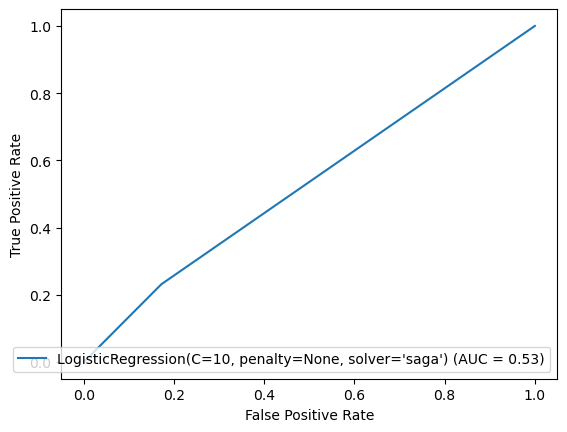

In [230]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y1_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = mod1)
display.plot()
plt.show()

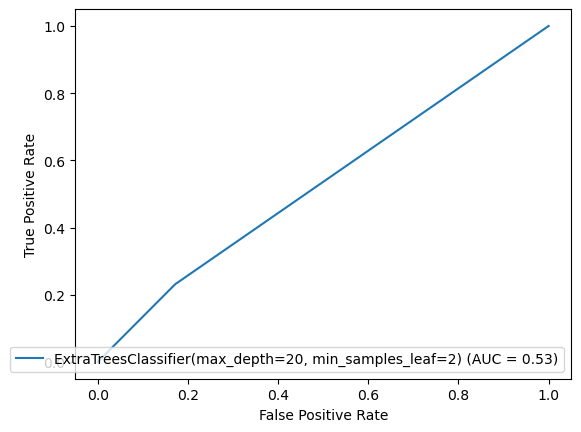

In [231]:
a, b, thresholds = metrics.roc_curve(y1_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = mod2)
display.plot()
plt.show()

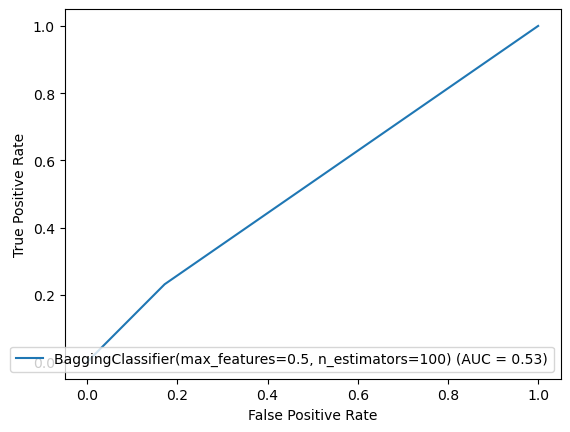

In [232]:
a, b, thresholds = metrics.roc_curve(y1_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = mod3)
display.plot()
plt.show()

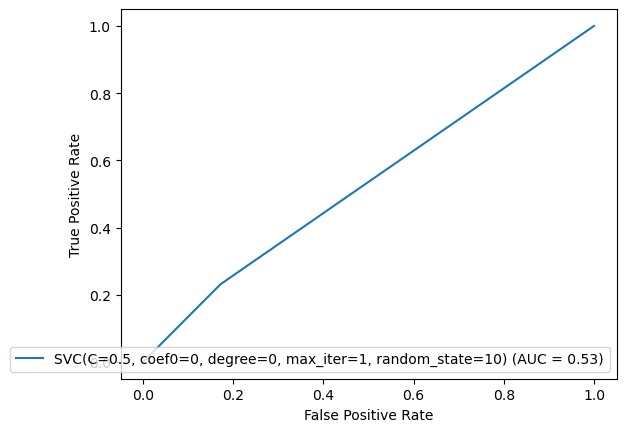

In [233]:
a, b, thresholds = metrics.roc_curve(y1_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = mod4)
display.plot()
plt.show()

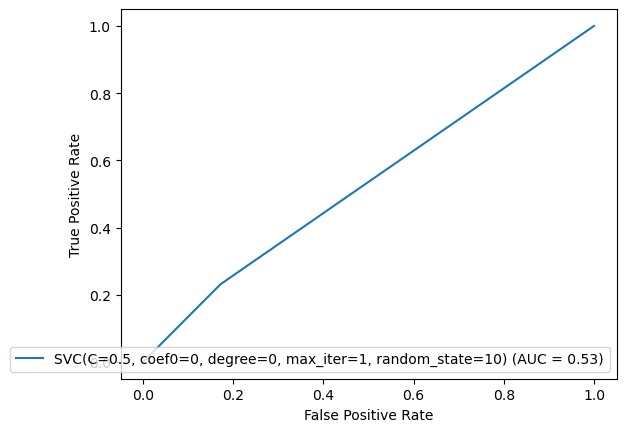

In [234]:
a, b, thresholds = metrics.roc_curve(y1_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [ ]:
pickle.dump(mod1, open('Rain_Today_Romuald.pkl', 'wb'))

In [ ]:
# recommendation

- reconduct more detailed data cleaning, preprocessing, analysis features Engineering to confirm whether the models above are overfitting or not
- test other correlation thresholds


# RainTomorrow

In [133]:
df2 = df.copy()

In [134]:
list(df2.columns)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [135]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df2:
    if df2[column].dtypes == 'object':  
        df2[column] = encoder.fit_transform(df2[column].values.reshape(-1,1))


df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,1.0,13.4,22.9,0.6,2.064951,28.66179,13.0,5.999946,13.0,...,1007.1,8.000000,4.301172,16.9,21.8,0.0,0.0,2008,12,1
1,2008-12-02,1.0,7.4,25.1,0.0,2.064951,28.66179,14.0,5.999946,6.0,...,1007.8,4.304212,4.301172,17.2,24.3,0.0,0.0,2008,12,2
2,2008-12-03,1.0,12.9,25.7,0.0,2.064951,28.66179,15.0,6.080712,13.0,...,1008.7,4.304212,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,2008-12-04,1.0,9.2,28.0,0.0,2.064951,28.66179,4.0,5.016840,9.0,...,1012.8,4.304212,4.301172,18.1,26.5,0.0,0.0,2008,12,4
4,2008-12-05,1.0,17.5,32.3,1.0,2.064951,28.66179,13.0,5.874072,1.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,9.0,3.5,21.8,0.0,2.064951,28.66179,0.0,5.405071,2.0,...,1021.2,4.304212,4.301172,9.4,20.9,0.0,0.0,2017,6,20
8420,2017-06-21,9.0,2.8,23.4,0.0,2.064951,28.66179,0.0,5.405071,9.0,...,1020.3,4.304212,4.301172,10.1,22.4,0.0,0.0,2017,6,21
8421,2017-06-22,9.0,3.6,25.3,0.0,2.064951,28.66179,6.0,4.893777,9.0,...,1019.1,4.304212,4.301172,10.9,24.5,0.0,0.0,2017,6,22
8422,2017-06-23,9.0,5.4,26.9,0.0,2.064951,28.66179,3.0,5.696423,9.0,...,1016.8,4.304212,4.301172,12.5,26.1,0.0,0.0,2017,6,23


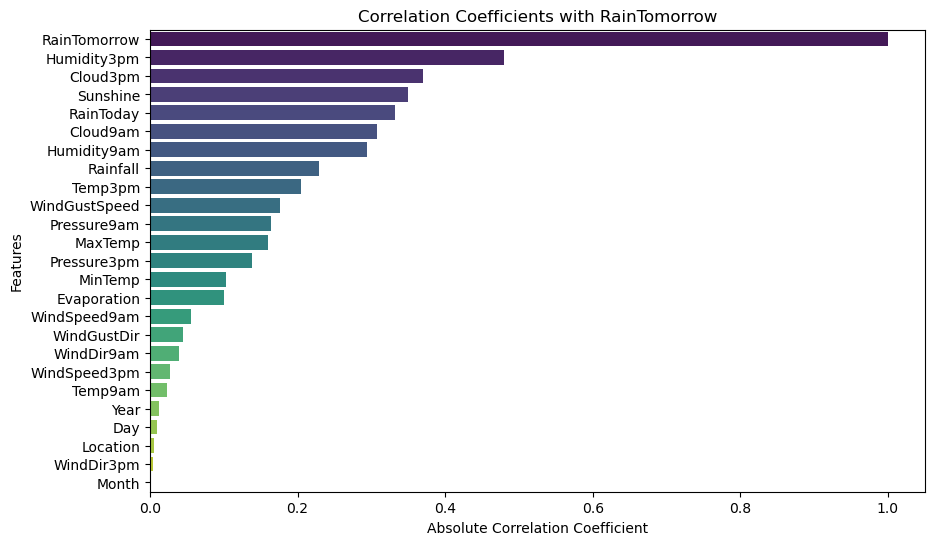

In [138]:

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Extract correlations with the target variable
corr_with_target = corr_matrix['RainTomorrow'].abs()

# Sort the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Create a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with RainTomorrow")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

- MinTemp and MaxTemp are strongly correlated
- MinTemp and Temp3pm are strongly correlated
- MinTemp and Temp9am are strongly correlated
- MaxTemp and Temp3pm are strongly correlated
- MaxTemp and Temp9am are strongly correlated
- Temp3pm and Temp9am are strongly correlated
- Pressure9am and Pressure3pm are strongly correlated
- Humidity9am and Humidity3pm are strongly correlated
- WindSpeed3pm and WindGustSpeed are strongly correlated

In [139]:
df2.drop(['MinTemp','MaxTemp','Temp9am','Pressure3pm','Humidity9am','WindSpeed3pm','Date'], axis = 1, inplace = True)

# feature selection for TomorrowRain

In [140]:
# Compute the correlation matrix
correlation_matrix = df2.corr()

# Select features with correlation > 0.1 with 'Rainfall'
relevant_features = correlation_matrix['RainTomorrow'][correlation_matrix['RainTomorrow'] > 0.05].index.tolist()

# Subset the DataFrame with relevant features
df_rt = df2[relevant_features]

df_rt


,Rainfall,WindGustSpeed,WindSpeed9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,5.999946,5.986804,22.0,8.000000,4.301172,0.0,0.0
1,0.0,5.999946,2.590946,25.0,4.304212,4.301172,0.0,0.0
2,0.0,6.080712,5.833292,30.0,4.304212,2.000000,0.0,0.0
3,0.0,5.016840,4.402678,16.0,4.304212,4.301172,0.0,0.0
4,1.0,5.874072,3.473009,33.0,7.000000,8.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
8419,0.0,5.405071,5.169934,27.0,4.304212,4.301172,0.0,0.0
8420,0.0,5.405071,4.801980,24.0,4.304212,4.301172,0.0,0.0
8421,0.0,4.893777,4.801980,21.0,4.304212,4.301172,0.0,0.0
8422,0.0,5.696423,3.963817,24.0,4.304212,4.301172,0.0,0.0


In [141]:

# seprating features and target

X = df_rt.drop('RainTomorrow', axis =1)
Y = df_rt['RainTomorrow']

In [142]:
Y.value_counts()

0.0    5023
1.0    1535
Name: RainTomorrow, dtype: int64

In [143]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X1, Y1 = smote.fit_resample(X, Y)


In [144]:
Y1.value_counts()

0.0    5023
1.0    5023
Name: RainTomorrow, dtype: int64

In [145]:
X = X1
Y = Y1

In [146]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

        Variable       VIF
0       Rainfall  1.324046
1  WindGustSpeed  1.494409
2   WindSpeed9am  1.457756
3    Humidity3pm  1.671742
4       Cloud9am  1.779205
5       Cloud3pm  1.887636
6      RainToday  1.522040


# Modelling

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [150]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(X_train,Y_train)
    pred_model = model.predict(X_test)
    acc = accuracy_score(Y_test, pred_model)
    pred_train = model.predict(X_train)
    print('accuracy_score on training data: ', accuracy_score(Y_train, pred_train))
    score = cross_val_score(model,X,Y)
    print(accuracy_score(Y_test, pred_model))
    print(confusion_matrix(Y_test, pred_model))
    print(classification_report(Y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(Y_test, pred_model) - score.mean())
    print('\n')

accuracy_score on training data:  0.7763472259092116
0.7615445859872612
[[1004  277]
 [ 322  909]]
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      1281
         1.0       0.77      0.74      0.75      1231

    accuracy                           0.76      2512
   macro avg       0.76      0.76      0.76      2512
weighted avg       0.76      0.76      0.76      2512

[0.78855721 0.67197611 0.69835739 0.79840717 0.81234445]
0.7539284661807933
The difference between accuracy score and cross validation score of  LogisticRegression() is:  0.007616119806467814


accuracy_score on training data:  0.9982744889832759
0.8742038216560509
[[1121  160]
 [ 156 1075]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1281
         1.0       0.87      0.87      0.87      1231

    accuracy                           0.87      2512
   macro avg       0.87      0.87      0.87      2512
weighted 

LogisticRegression has the difference between accuracy score and cross validation score and a good training accuracy. we select it as our best model

In [235]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
GV = GridSearchCV(LogisticRegression(), param_grid, cv=5)
GV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [236]:
GV.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [237]:
model1 = LogisticRegression(C=1, penalty=None, solver='saga')
model1.fit(X_train, Y_train)
pred = model1.predict(X_test)
print('Acuuracy Score=', (accuracy_score(Y_test, pred))*100) 


Acuuracy Score= 76.15445859872611


In [239]:
pickle.dump(model1, open('RainTomorrow_Romuald.pkl', 'wb'))

In [ ]:
# recommendation

- we should continuous to perform more detailed data analytics to screen in better features in improving model accuracy. other classifiers should also be tested for better accuracy